In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

In [28]:
%run 1_naturalGas_Wrangling.ipynb

## Demand

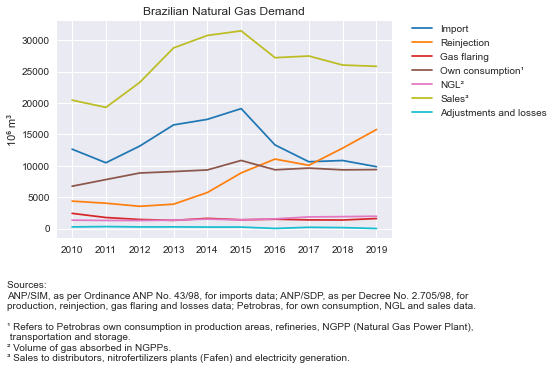

In [33]:
demand.df.plot(colormap='tab10')
plt.xticks(np.arange(2010,2020,1))
plt.ylabel(demand.unit)
plt.title(demand.title)
plt.figtext(0.01,-0.3, balance.footer)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/demand.png',dpi=1200,bbox_inches='tight')

## Balance

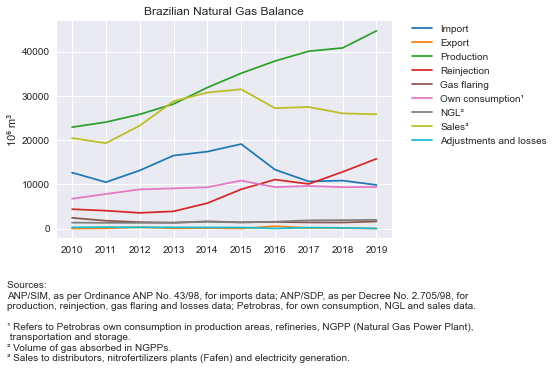

In [30]:
balance.df.plot(colormap='tab10')
plt.figtext(0.01,-0.3, balance.footer)
plt.ylabel(balance.unit)
plt.xticks(np.arange(2010,2020,1))
plt.title(balance.title)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/balance.png',dpi=600,bbox_inches='tight')

## Balance Correlation

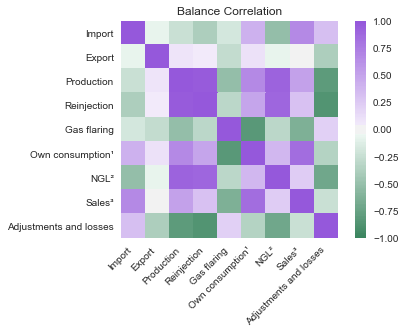

In [31]:
corr = balance.df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))
    cmap=sns.diverging_palette(145, 280, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title('Balance Correlation')
plt.savefig('plots/corr.png',dpi=600,bbox_inches='tight')

## Electric Energy by Source

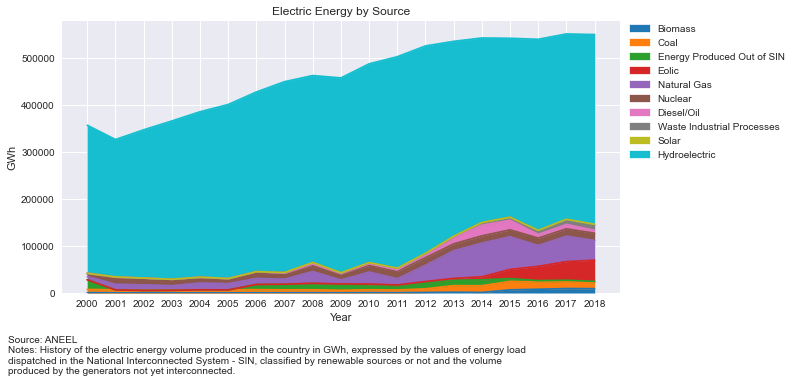

In [32]:
energy_source.df.sum(axis=0, level=0).plot(kind='area', figsize=(10,5), colormap='tab10')
plt.figtext(0.05,-0.1, energy_source.footer)
plt.ylabel(energy_source.unit)
plt.xticks(np.arange(2000,2019,1))
plt.title(energy_source.title)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/energy_source.png',dpi=600,bbox_inches='tight')

## Average Reference Price for Natural Gas

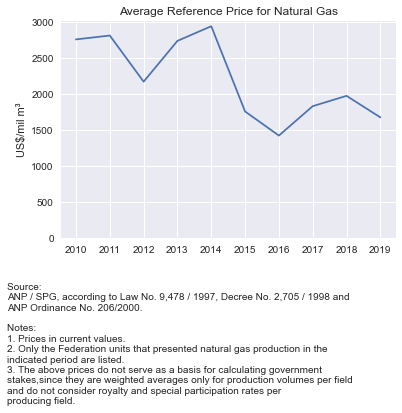

In [34]:
avg_price.df.sum(axis=1).plot()
plt.figtext(0.001,-0.45, avg_price.footer)
plt.ylabel(avg_price.unit)
plt.yticks(np.arange(0,3500,500))
plt.xticks(np.arange(2010,2020,1))
plt.title('Average Reference Price for Natural Gas')
plt.savefig('plots/avg_price.png',dpi=600,bbox_inches='tight')

## Sales by Segment

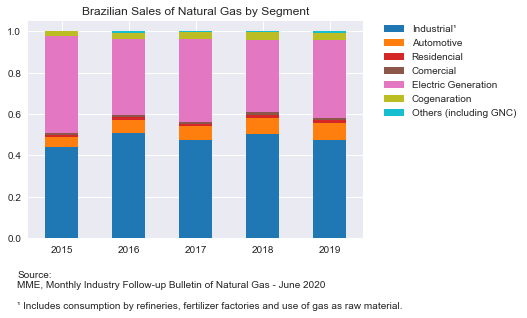

In [38]:
sales_per.df.plot(kind='bar', stacked=True, colormap='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_per.title)
plt.xticks(rotation=0)
plt.figtext(0.1,-0.12, sales_per.footer);
plt.savefig('plots/sales_per.png',dpi=600,bbox_inches='tight')

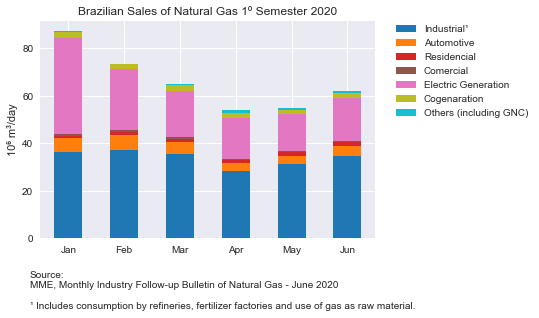

In [40]:
sales_seg_covid.df.plot(kind='bar', stacked=True, colormap='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_seg_covid.title)
plt.xticks(rotation=0)
plt.ylabel(sales_seg_covid.unit)
plt.figtext(0.1,-0.12, sales_seg_covid.footer);
plt.savefig('plots/sales_seg_covid.png',dpi=600,bbox_inches='tight')

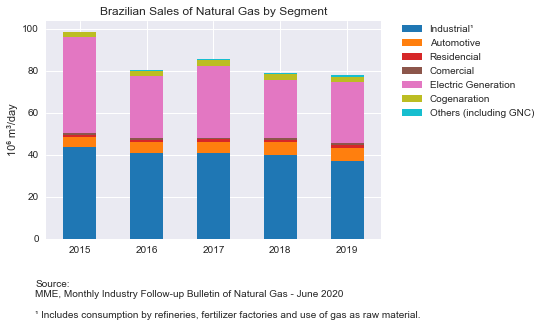

In [42]:
sales_segment.df.plot(kind='bar', stacked=True, colormap='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.title(sales_segment.title)
plt.xticks(rotation=0)
plt.ylabel(sales_segment.unit)
plt.figtext(0.1,-0.15, sales_segment.footer);
plt.savefig('plots/sales_seg.png',dpi=600,bbox_inches='tight')

## Time Series Plots

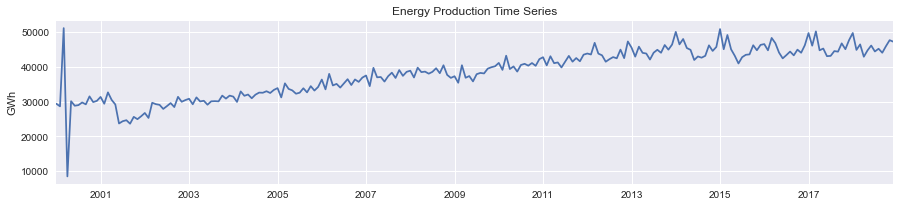

In [39]:
ts_energy.plot(figsize=(15,3))
plt.legend().remove()
plt.title('Energy Production Time Series')
plt.ylabel('GWh');
plt.savefig('plots/ts_energy.png',dpi=600,bbox_inches='tight');

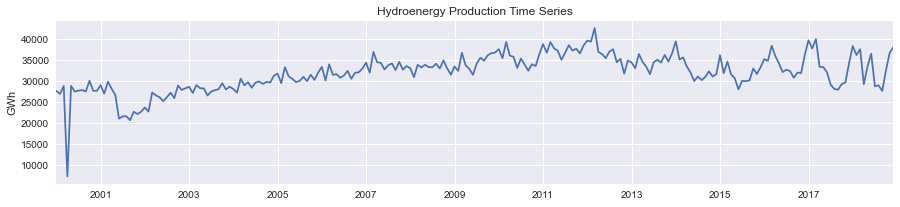

In [41]:
ts_hydro.plot(figsize=(15,3))
plt.legend().remove()
plt.title('Hydroenergy Production Time Series')
plt.ylabel('GWh');
plt.savefig('plots/ts_hydro.png',dpi=600,bbox_inches='tight');

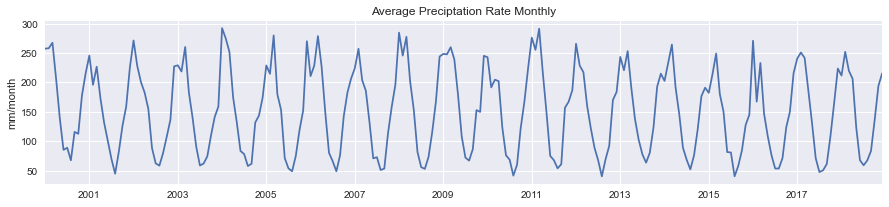

In [43]:
ts_precip.plot(figsize=(15,3))
plt.legend().remove()
plt.title(precip.title)
plt.ylabel(precip.unit);
plt.savefig('plots/ts_precip.png',dpi=600,bbox_inches='tight');

## Carbon Dioxide Emissions Coefficients

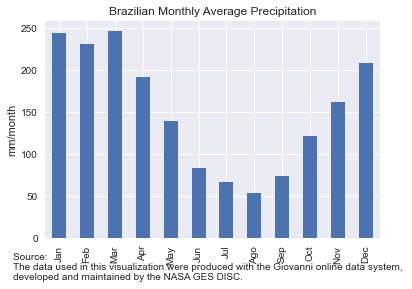

In [44]:
precip.df.mean().plot(kind='bar')
plt.ylabel(precip.unit)
plt.title('Brazilian Monthly Average Precipitation')
plt.figtext(0.05,-0.02, precip.footer);
plt.savefig('plots/avg_precip.png',dpi=1200,bbox_inches='tight');


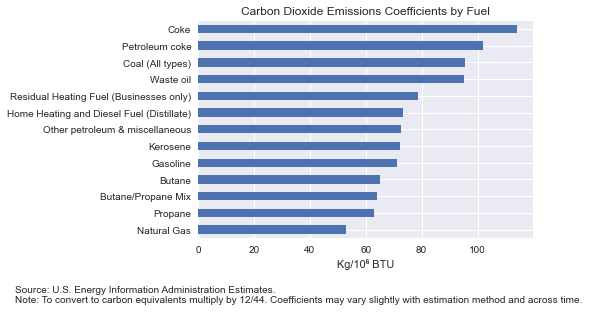

In [45]:
co2_emission.df.loc[['Propane', 'Butane', 'Butane/Propane Mix',
       'Home Heating and Diesel Fuel (Distillate)', 'Kerosene',
       'Coal (All types)', 'Natural Gas', 'Gasoline',
       'Residual Heating Fuel (Businesses only)', 'Petroleum coke',
       'Other petroleum & miscellaneous', 'Coke','Waste oil']].sort_values(co2_emission.unit).plot(kind='barh')
plt.xlabel(co2_emission.unit)
plt.legend().remove()
plt.figtext(-0.3,-0.1, co2_emission.footer);
plt.title(co2_emission.title);

## Comparing Natural Gas

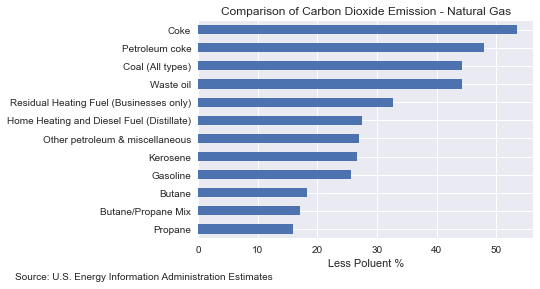

In [46]:
less_pol.sort_values('Less Poluent %').plot(kind='barh')
plt.legend().remove()
plt.xlabel('Less Poluent %')
plt.title('Comparison of Carbon Dioxide Emission - Natural Gas');
plt.figtext(-0.3,-0.02, 'Source: U.S. Energy Information Administration Estimates');
plt.savefig('plots/cmp_co2.png',dpi=600,bbox_inches='tight');

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.barh(y, width=co2_emission.df.loc['Coke'])

NameError: name 'y' is not defined

In [48]:
y = less_pol.sort_values('Less Poluent %').index.values

In [49]:
x1 = co2_emission.df.loc[['Propane', 'Butane', 'Butane/Propane Mix',
       'Home Heating and Diesel Fuel (Distillate)', 'Kerosene',
       'Coal (All types)', 'Natural Gas', 'Gasoline',
       'Residual Heating Fuel (Businesses only)', 'Petroleum coke',
       'Other petroleum & miscellaneous', 'Coke','Waste oil']].sort_values(co2_emission.unit).values
np.resize(x1,1)

array([53.0703704])

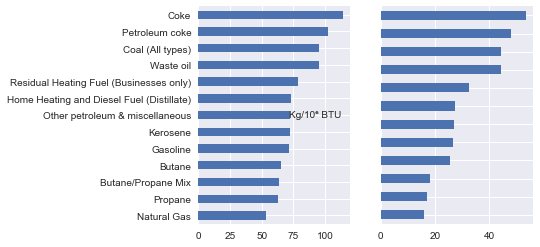

In [50]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

# Plotting
co2_emission.df.loc[['Propane', 'Butane', 'Butane/Propane Mix',
       'Home Heating and Diesel Fuel (Distillate)', 'Kerosene',
       'Coal (All types)', 'Natural Gas', 'Gasoline',
       'Residual Heating Fuel (Businesses only)', 'Petroleum coke',
       'Other petroleum & miscellaneous', 'Coke','Waste oil']].sort_values(co2_emission.unit).plot(kind='barh',ax=ax1)

less_pol.sort_values('Less Poluent %').plot(kind='barh',ax=ax2, sharey=True)
plt.legend().remove()


In [51]:
demand.df.describe()

,Import,Reinjection,Gas flaring,Own consumption¹,NGL²,Sales³,Adjustments and losses
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,13395.531597,8017.388093,1574.743305,9039.818691,1537.531449,26072.402784,194.134380
std,3234.650477,4332.357979,326.970725,1099.308406,267.024911,4046.170946,106.485898
min,9855.431833,3542.732598,1302.885282,6744.762530,1281.447149,19307.265264,4.216716
25%,10692.512201,4120.561950,1382.270750,8907.010303,1335.472244,23926.744925,161.956004
50%,12894.975030,7303.201500,1464.299475,9343.899778,1443.061500,26637.604411,236.093760
75%,15715.279500,10821.331105,1611.840618,9385.178597,1773.531000,28460.447045,261.035651
max,19111.557000,15776.669711,2417.758896,10851.056777,1960.897610,31502.467702,313.817972


In [52]:
ts_hydro

,GWh
2000-01-31,27598.530133
2000-02-29,26882.655166
2000-03-31,28778.212451
2000-04-30,7167.587300
2000-05-31,28801.292900
...,...
2018-08-31,28915.000000
2018-09-30,27596.000000
2018-10-31,32484.311867
2018-11-30,36678.253965
